# Exploratory Data Analysis Exercise
* For this part we will be using the `cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

df = pd.read_csv('cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


###Q1. Print the number of duplicate rows we have in our dataframe.

In [2]:
sum(df.duplicated())

720

###Q2. Modify our df to have all duplicate rows removed.


In [3]:
df.drop_duplicates(inplace=True)

###Q3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
sum(df.duplicated())

0

###Q4. Which column has the most null values and how many null values does it have?


In [5]:
df.isna().apply(lambda x: sum(x)).sort_values(ascending=False).head(1)

Engine HP    69
dtype: int64

###Q5. Print how long our dataframe is.

In [6]:
len(df)

11194

###Q6. Remove any row that has a null value in it.

In [7]:
df.dropna(inplace=True)

###Q7. Which column has the most null values and how many null values does it have?

In [8]:
len(df)

11092

###Q8. Make a bar chart that displays how many time each brand of car appears in this data.

* _Brand of car is the `Make` of the car._

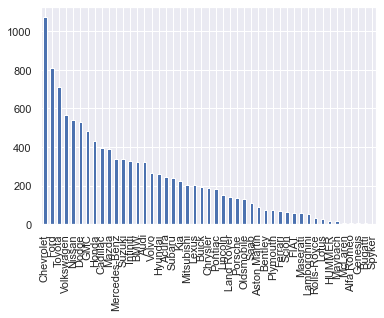

In [9]:
df.Make.value_counts().plot.bar()
plt.show()

###Q9. Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

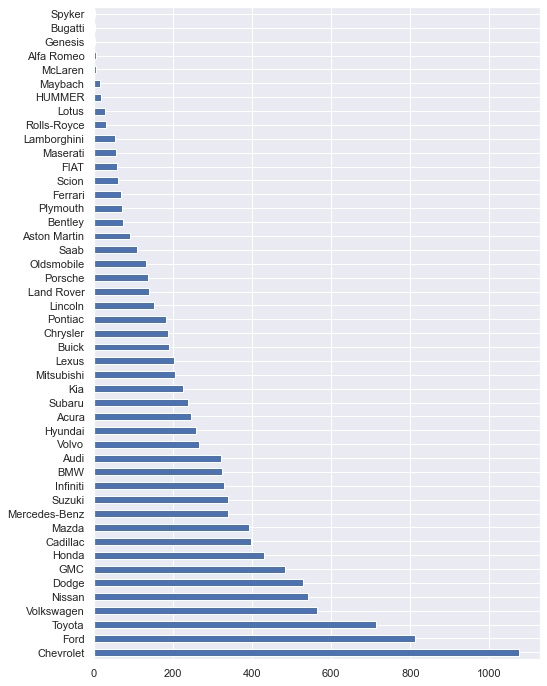

In [10]:
plt.figure(figsize=(8,12))
df.Make.value_counts().plot.barh()
plt.show()

###Q10. Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

* What's noticeable about it and what do you think the error is...


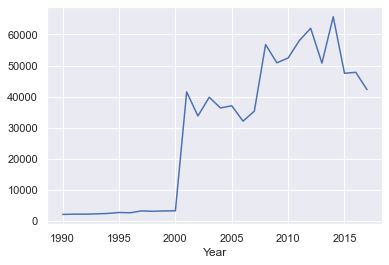

In [11]:
x = sorted(df.Year.unique())
y = df.MSRP.groupby(df.Year).mean().tolist()
plt.plot(x, y)
plt.xlabel('Year')
plt.show()

### It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

In [12]:
def adjust_price(x: pd.Series):
    return x['MSRP']*10 if x['Year'] <= 2000 else x['MSRP']

df['adjusted_price'] = df.apply(lambda x: adjust_price(x), axis=1)

###Q11. Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

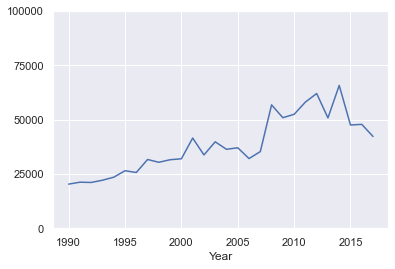

In [13]:
x = sorted(df.Year.unique())
y = df.adjusted_price.groupby(df.Year).mean().tolist()
plt.plot(x, y)
plt.xlabel('Year')
plt.yticks(np.linspace(start=0,stop=100000,num=5))
plt.show()

###Q12. What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [14]:
pd.options.display.float_format = '{:.3f}'.format
df.adjusted_price.groupby(df.Make).mean().sort_values(ascending=False).head()

Make
Bugatti       1757223.667
Maybach        546221.875
Rolls-Royce    351130.645
Lamborghini    331567.308
Bentley        247169.324
Name: adjusted_price, dtype: float64

###Q13. What are the top 5 car makers that have the highest median highway MPG?

In [15]:
pd.reset_option('display.float_format')
df['highway MPG'].groupby(df.Make).median().sort_values(ascending=False).head()

Make
Alfa Romeo    34.0
FIAT          33.0
Volkswagen    32.0
Scion         32.0
Honda         32.0
Name: highway MPG, dtype: float64

###Q14. Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

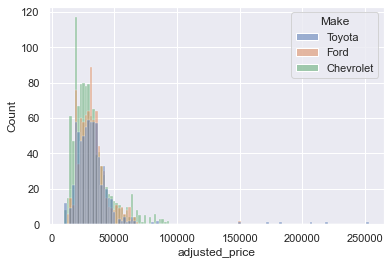

In [16]:
data = df[df.Make.isin(['Chevrolet','Ford','Toyota'])]
sns.histplot(df[df.Make.isin(['Chevrolet','Ford','Toyota'])],x='adjusted_price',hue='Make')
plt.show()

###Q15. Remake the same histogram, but limit the x-axis from 0 to 100,000

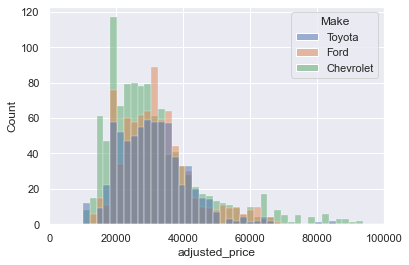

In [17]:
data = df[df.Make.isin(['Chevrolet','Ford','Toyota'])]
ax = sns.histplot(df[df.Make.isin(['Chevrolet','Ford','Toyota'])],x='adjusted_price',hue='Make')
ax.set_xlim(0,100000)
plt.show()

###Q16(with an answer). Plot the relationship between Engine HP and highway MPG

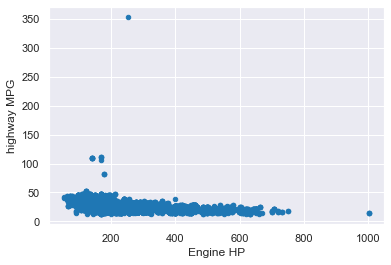

In [18]:
# Plot the relationship between Engine HP and highway MPG
df.plot(kind='scatter', x='Engine HP', y='highway MPG', color='#1f77b4')
plt.show()

###Q17(with an answer). Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

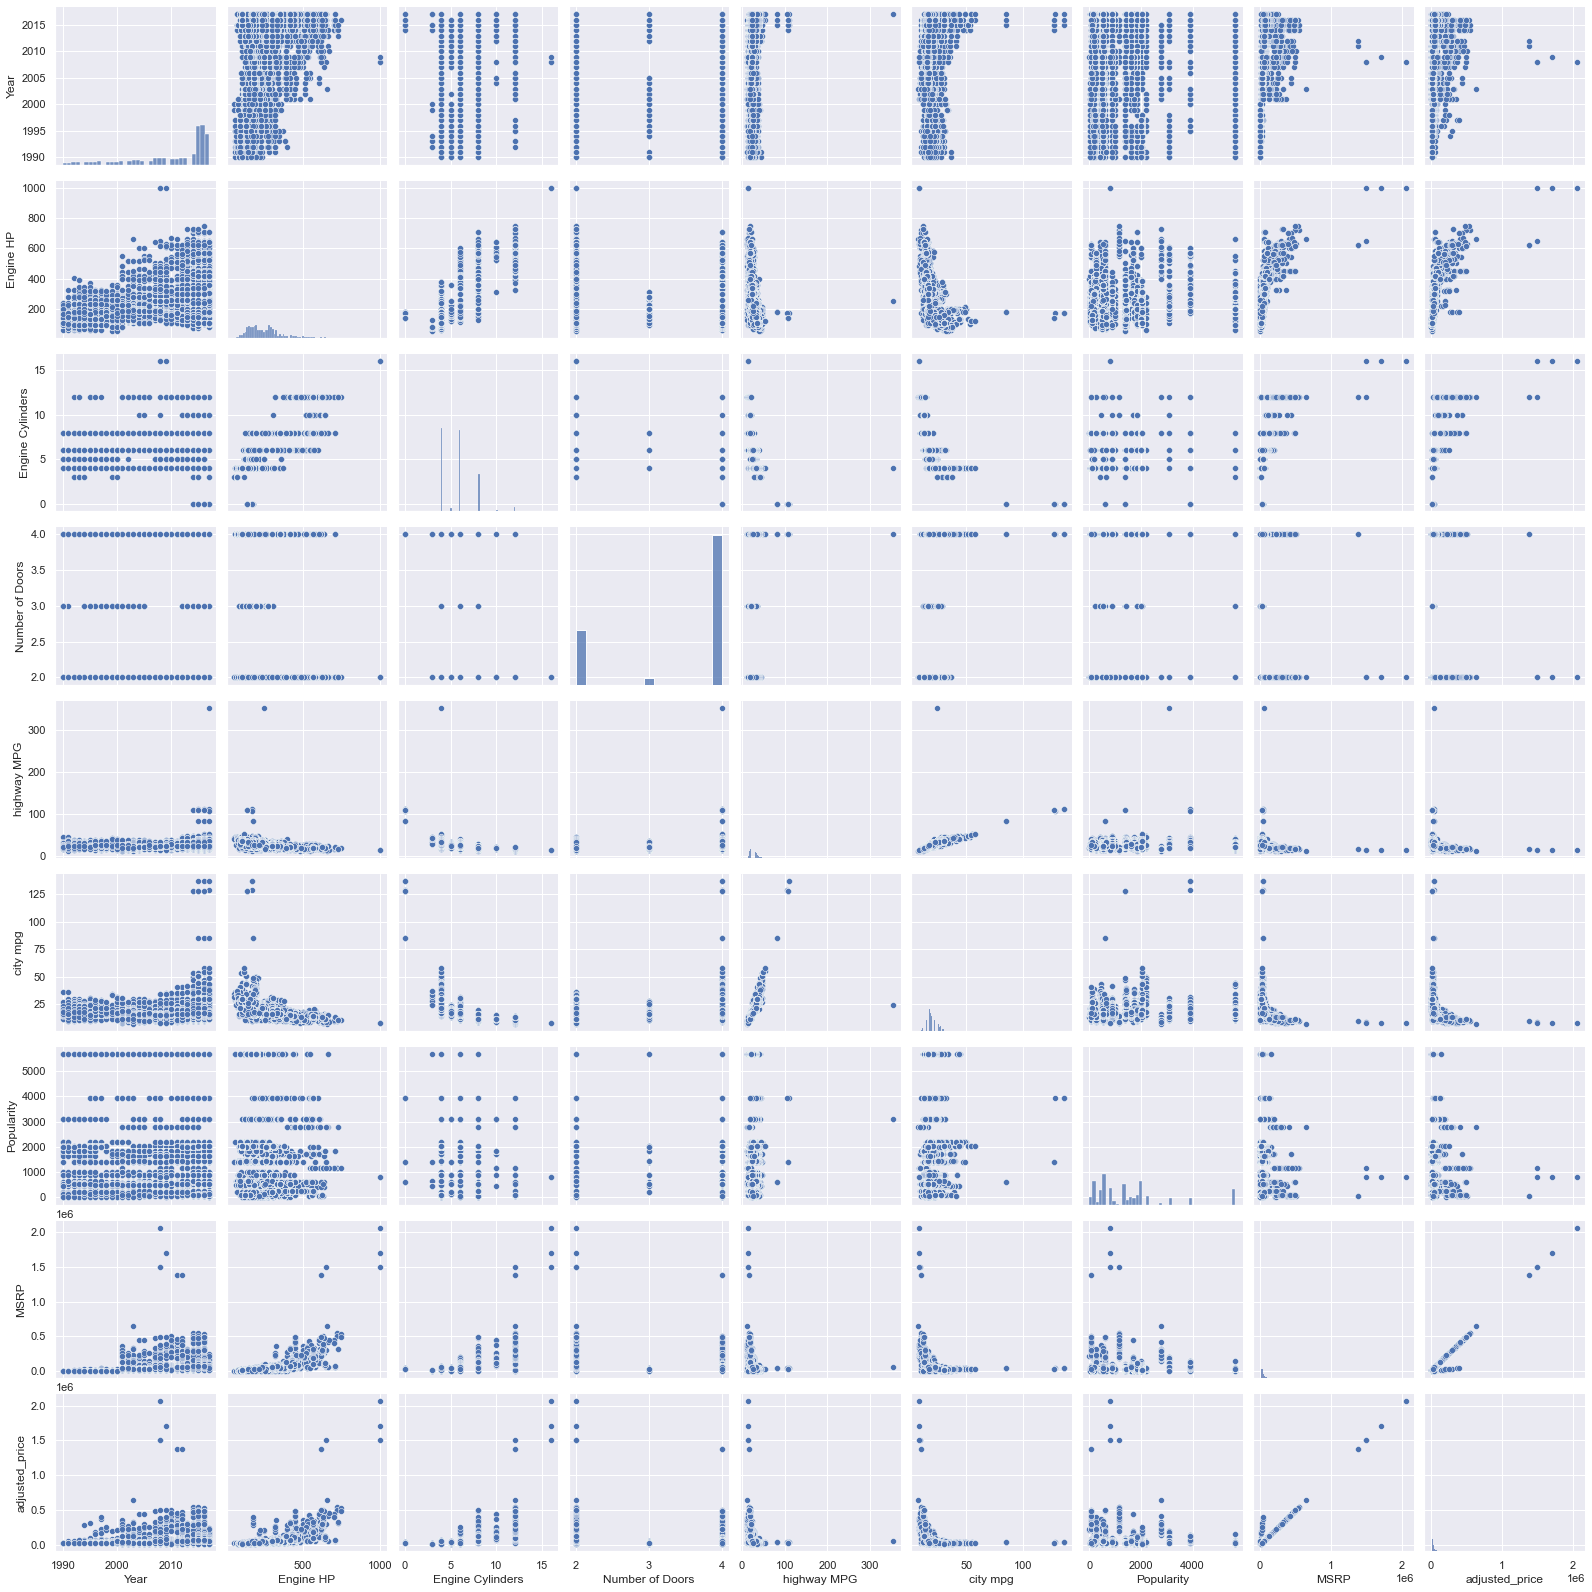

In [19]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(data=df)
plt.show()

###Q18(with an answer). Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

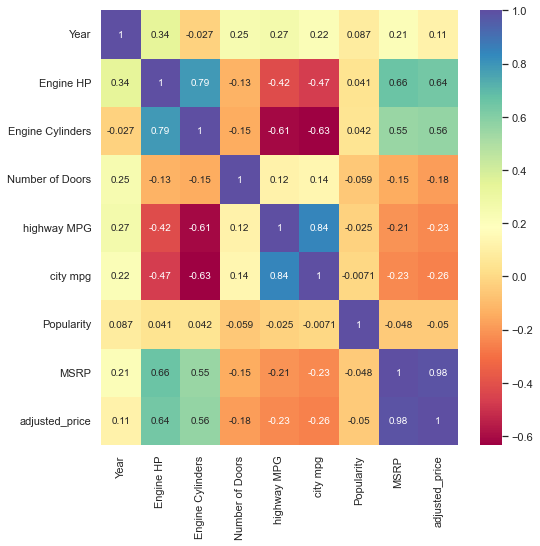

In [20]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()